In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from yellowbrick.target import FeatureCorrelation

import warnings
warnings.filterwarnings("ignore")

##Read data from github

In [ ]:
data = pd.read_csv("https://github.com/Umadevi65B/Spotify_data/blob/main/data_spotofy.zip?raw=true",  compression='zip')
data_genres = pd.read_csv("https://raw.githubusercontent.com/Umadevi65B/Spotify_data/main/data_by_genres.csv")
data_artist = pd.read_csv("https://raw.githubusercontent.com/Umadevi65B/Spotify_data/main/data_by_artist.csv")
data_year = pd.read_csv("https://raw.githubusercontent.com/Umadevi65B/Spotify_data/main/data_by_year.csv")
data_w_genres = pd.read_csv("https://raw.githubusercontent.com/Umadevi65B/Spotify_data/main/data_w_genres.csv")

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
data_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
data_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [ ]:
data_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
data_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


## Data Cleaning

In [ ]:
print(data.shape)
print(data_genres.shape)
print(data_artist.shape)
print(data_year.shape)
print(data_w_genres.shape)

(170653, 19)
(2973, 14)
(28680, 15)
(100, 14)
(28680, 16)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
# Drop Null Values

data.dropna()
data_genres.dropna()
data_artist.dropna()
data_year.dropna()
data_w_genres.dropna()

print(data.shape)
print(data_genres.shape)
print(data_artist.shape)
print(data_year.shape)
print(data_w_genres.shape)

(170653, 19)
(2973, 14)
(28680, 15)
(100, 14)
(28680, 16)


## Exploratory Data Analysis

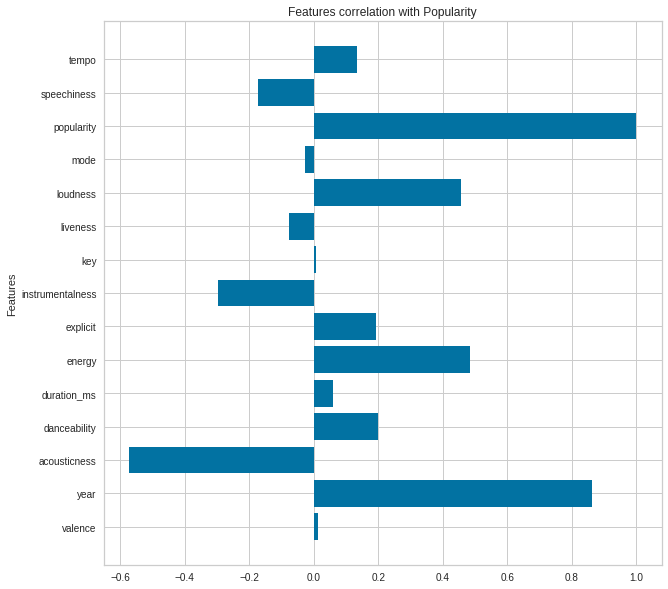

In [ ]:
# Create a list of the feature names

df_num = data.select_dtypes(np.number)
features = np.array(df_num.columns)

x = data[features]
y = data['popularity']
plt.title('Features correlation with Popularity')
plt.ylabel('Features')

# Instantiate the visualizer
plot_xy = FeatureCorrelation(labels=features)

# plt.plot(x,y)

plt.rcParams['figure.figsize']=(10,10)
plot_xy.fit(x, y)  
plt.show()

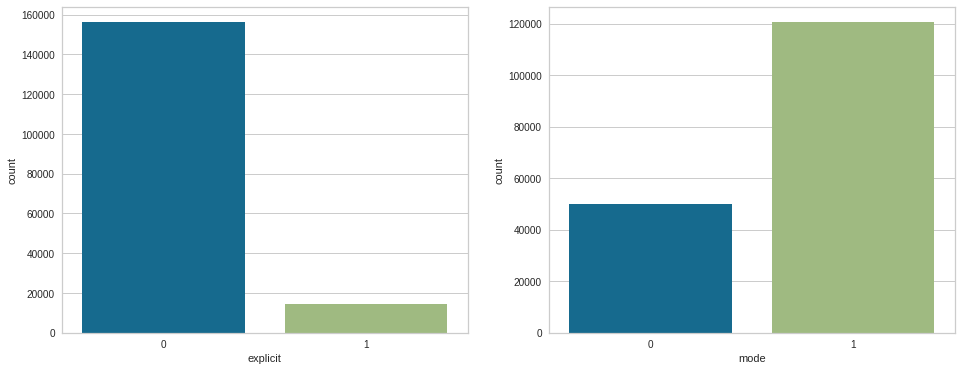

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(ax=axes[0], x='explicit', data=data)
sns.countplot(ax=axes[1], x='mode', data=data)
plt.show()

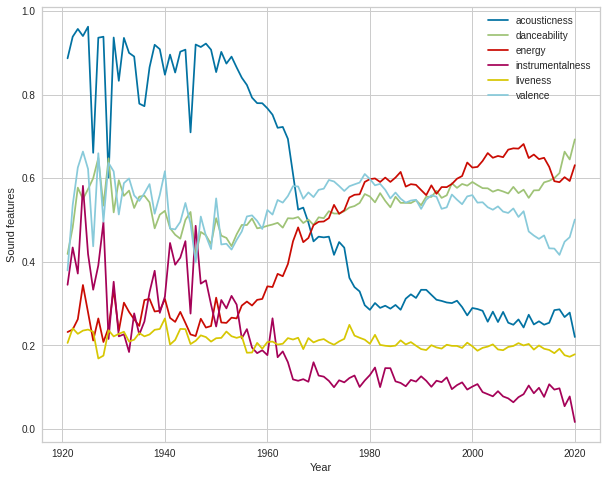

In [ ]:
# Dataset containing colomns related to sound
sound_col = data_year[['acousticness', 'danceability','energy', 'instrumentalness',
                    'liveness', 'valence','year']]
df = sound_col.reset_index(drop=True)
df.set_index('year',inplace=True)

# Scatter Plot
df.plot(figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Sound features')
plt.show()

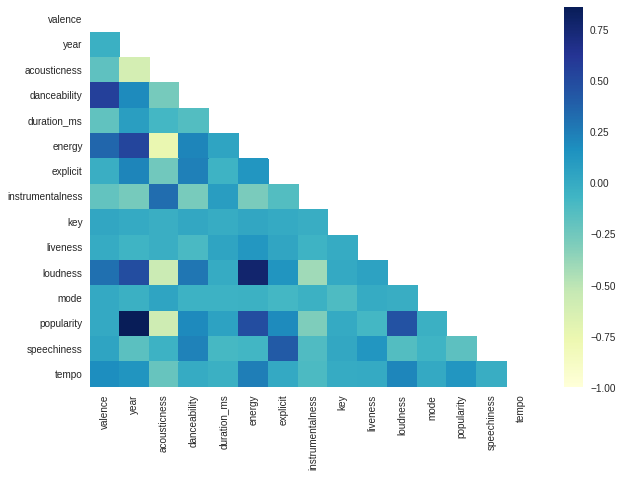

In [ ]:
# features corelation matrix
plt.figure(figsize=(10,7))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmin=-1, annot=False, cmap="YlGnBu")

plt.show()

In [ ]:
# Plot of top 10 genres
top10_genres = data_genres.nlargest(10, 'popularity')

plt = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'])
plt.show()

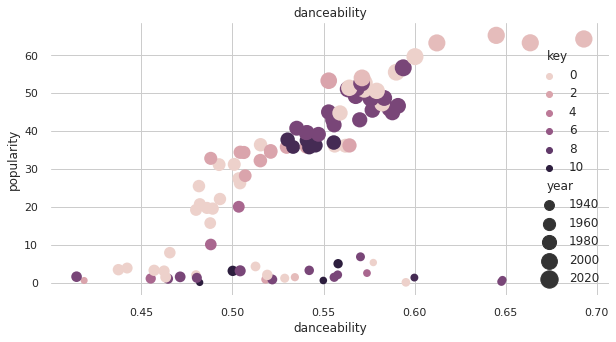

In [ ]:
# scatterplot for danceability vs popularity across different years
sns.set_style('whitegrid')
sns.scatterplot(x="danceability", y="popularity",
                hue="key", size="year",
                sizes=(50, 300), linewidth=0,
                data=data_year,legend=True).set(title='danceability')
sns.despine(left = True,bottom=True)